<a href="https://colab.research.google.com/github/gcprado/vc/blob/main/entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install lap

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
import cv2
import math
import yaml
import csv
from collections import defaultdict
import numpy as np
from ultralytics import YOLO

In [6]:
print(">>> Comenzando la fase de entrenamiento del detector personalizado...")

# Cargar el modelo base preentrenado
modelo = YOLO("yolo11l.pt")

# Ejecutar entrenamiento con el dataset configurado
resultado_entrenamiento = modelo.train(
    data="data.yaml",
    imgsz=640,
    epochs=150,
    patience=50,
    project="runs/matriculas_model",
    name="version_1",
    exist_ok=True,
    plots=True
)

print(">>> Entrenamiento finalizado correctamente.")


>>> Comenzando la fase de entrenamiento del detector personalizado...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=version_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3354.3±868.8 MB/s, size: 335.1 KB)
val: Scanning /content/TGC_RBNW/test/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 52.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.1it/s 1.8s
                   all         30         38      0.932      0.763       0.81      0.549
Speed: 6.5ms preprocess, 28.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/detect/val2


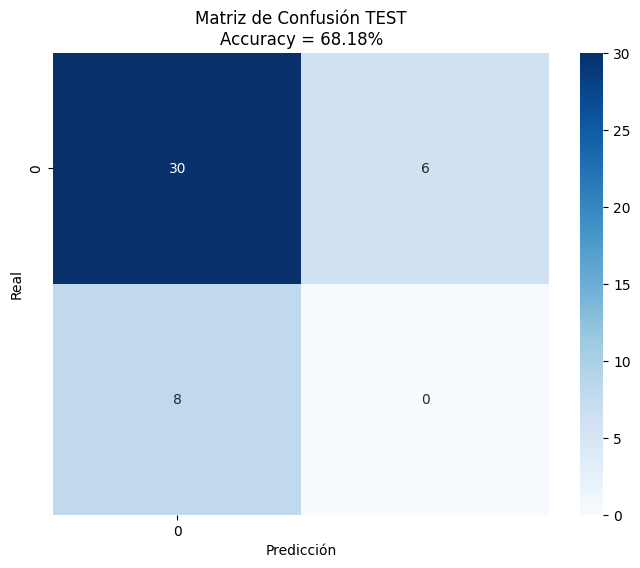

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO

# ============================
# Cargar modelo entrenado
# ============================
modelo = YOLO("runs/matriculas_model/version_1/weights/best.pt")  # Ajusta la ruta si es distinta

# ============================
# Evaluación sobre el conjunto de TEST
# ============================
resultado_test = modelo.val(data="data.yaml", split="test")

# ============================
# Extraer matriz de confusión
# ============================
matrix = resultado_test.confusion_matrix.matrix
class_names = resultado_test.names

if matrix is not None and matrix.size > 0:
    # Cálculo de accuracy
    aciertos_correctos = np.diag(matrix).sum()
    total_predicciones = matrix.sum()

    if total_predicciones > 0:
        accuracy = aciertos_correctos / total_predicciones

        # Convertir a enteros para visualización
        matrix_int = matrix.astype(int)

        # ============================
        # Graficar matriz de confusión
        # ============================
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix_int, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicción")
        plt.ylabel("Real")
        plt.title(f"Matriz de Confusión TEST\nAccuracy = {accuracy * 100:.2f}%")
        plt.show()
    else:
        print("No se detectaron predicciones en el conjunto de test.")
else:
    print("La matriz de confusión del test está vacía o no se generó.")
